In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

data_folder = 'data'

data = []
labels = []

class_label_mapping = {}

for i, class_folder in enumerate(os.listdir(data_folder)):
    class_label_mapping[class_folder] = i
    
    class_path = os.path.join(data_folder, class_folder)
    
    if not os.path.isdir(class_path):
        continue
    
    label = i
    
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        
        image = cv2.imread(image_path)
        
        image = cv2.resize(image, (256, 256))
        
        data.append(image)
        labels.append(label)

data = np.array(data)
labels = np.array(labels)

labels = to_categorical(labels)

2024-01-30 16:20:41.720902: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-30 16:20:42.319878: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-30 16:20:42.320374: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-30 16:20:42.405628: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-30 16:20:42.594954: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-30 16:20:42.596172: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
labels

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [5]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.1, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

train_data = train_data / 255.0
val_data = val_data/255.0
test_data = test_data / 255.0

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

hist = model.fit(train_data, train_labels, epochs=20, validation_data=(val_data, val_labels))

2024-01-30 16:21:36.243080: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 683409408 exceeds 10% of free system memory.


Epoch 1/20


2024-01-30 16:21:39.570103: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 132128768 exceeds 10% of free system memory.
2024-01-30 16:21:39.818680: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 64000000 exceeds 10% of free system memory.
2024-01-30 16:21:40.178596: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 64000000 exceeds 10% of free system memory.
2024-01-30 16:21:40.557873: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 66064384 exceeds 10% of free system memory.


28/28 [==============================] - 37s 1s/step - loss: 1.5976 - accuracy: 0.2209 - val_loss: 1.5850 - val_accuracy: 0.3945
Epoch 2/20
28/28 [==============================] - 34s 1s/step - loss: 1.5101 - accuracy: 0.3222 - val_loss: 1.4120 - val_accuracy: 0.4128
Epoch 3/20
28/28 [==============================] - 36s 1s/step - loss: 1.3850 - accuracy: 0.3797 - val_loss: 1.3797 - val_accuracy: 0.3991
Epoch 4/20
28/28 [==============================] - 39s 1s/step - loss: 1.3462 - accuracy: 0.4028 - val_loss: 1.3812 - val_accuracy: 0.3853
Epoch 5/20
28/28 [==============================] - 40s 1s/step - loss: 1.2952 - accuracy: 0.4522 - val_loss: 1.2678 - val_accuracy: 0.4771
Epoch 6/20
28/28 [==============================] - 37s 1s/step - loss: 1.1789 - accuracy: 0.4971 - val_loss: 1.2684 - val_accuracy: 0.4541
Epoch 7/20
28/28 [==============================] - 35s 1s/step - loss: 1.1196 - accuracy: 0.5547 - val_loss: 1.1748 - val_accuracy: 0.5780
Epoch 8/20
28/28 [=============

In [7]:
from matplotlib import pyplot as plt

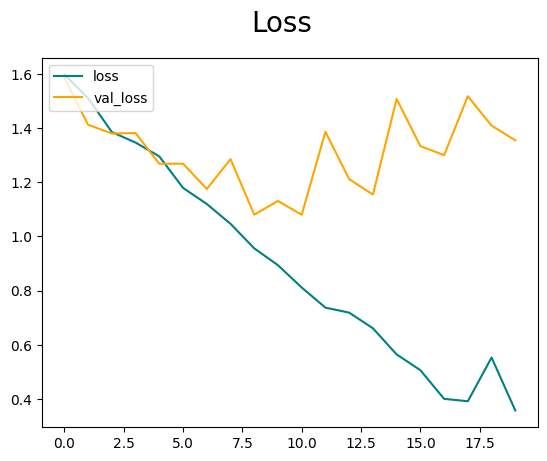

In [8]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

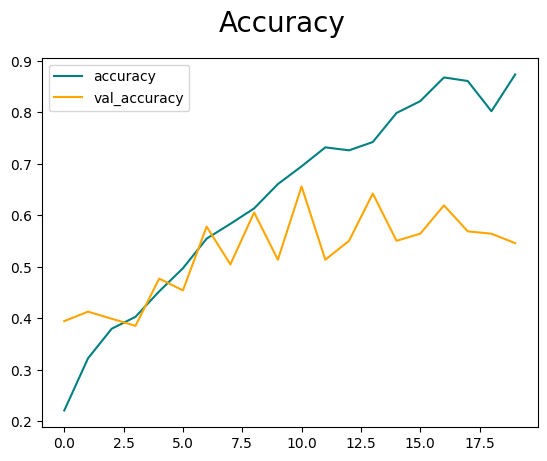

In [9]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

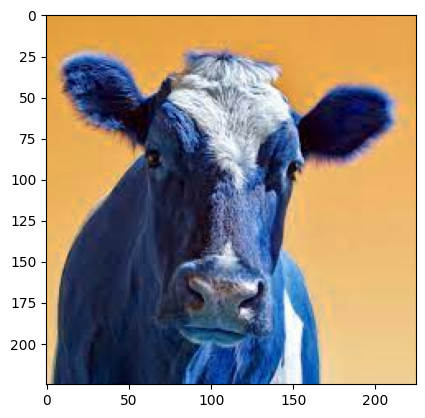

In [10]:
img = cv2.imread('a.jpeg')
plt.imshow(img)
plt.show()

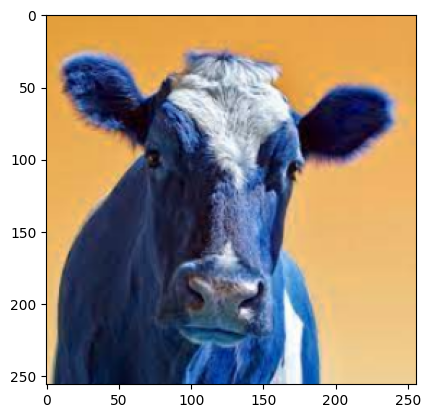

In [11]:
image = cv2.resize(img, (256, 256))

plt.imshow(image.astype(int))
plt.show()

In [12]:
yhat = model.predict(np.expand_dims(image/255, 0))
yhat

1/1 [==============================] - 0s 214ms/step


array([[0.32726556, 0.00227689, 0.02436757, 0.53323776, 0.1128522 ]],
      dtype=float32)

In [15]:
import numpy as np

def predict_image(model, image):
    
    image = np.expand_dims(image, axis=0)
    
    predictions = model.predict(image)
    
    predicted_class = np.argmax(predictions, axis=1)[0]
    
    class_probabilities = predictions[0]
    
    return predicted_class, class_probabilities

predicted_class, class_probabilities = predict_image(model, image/255)

print("Predicted Class:", predicted_class)

class_labels = {value: key for key, value in class_label_mapping.items()}
print("Type: ", class_labels[predicted_class])

print("Class Probabilities:", class_probabilities)

1/1 [==============================] - 0s 57ms/step
Predicted Class: 3
Type:  Red Dane cattle
Class Probabilities: [0.32726556 0.00227689 0.02436757 0.53323776 0.1128522 ]


In [19]:
from tensorflow.keras.models import load_model

model.save(os.path.join('models','cattle_detector.h5'))

In [18]:
from tensorflow.keras.models import load_model

new_model = load_model('models/cattle_detector.h5')

In [29]:
import cv2

def preprocess_frame(frame):
    resized_frame = cv2.resize(frame, (256, 256))
    return resized_frame

def live_camera_prediction(new_model):
    cap = cv2.VideoCapture(0)

    while True:
        ret, frame = cap.read()

        processed_frame = preprocess_frame(frame)

        predicted_class, percentages = predict_image(new_model, processed_frame/255)

        perc = percentages.max()

        if perc > 0.85:
            cv2.putText(frame, f'{class_labels[predicted_class]} : {perc*100}%', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        else:
            cv2.putText(frame, f'Not a cow', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        
        cv2.imshow('Live Camera Prediction', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

live_camera_prediction(new_model)


1/1 [==============================] - 0s 42ms/step
